# Load Packages

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Import Data

In [27]:
df = pd.read_csv("dataset.csv")

# Simple view of data

In [28]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [30]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Is there missing data? 

<AxesSubplot:>

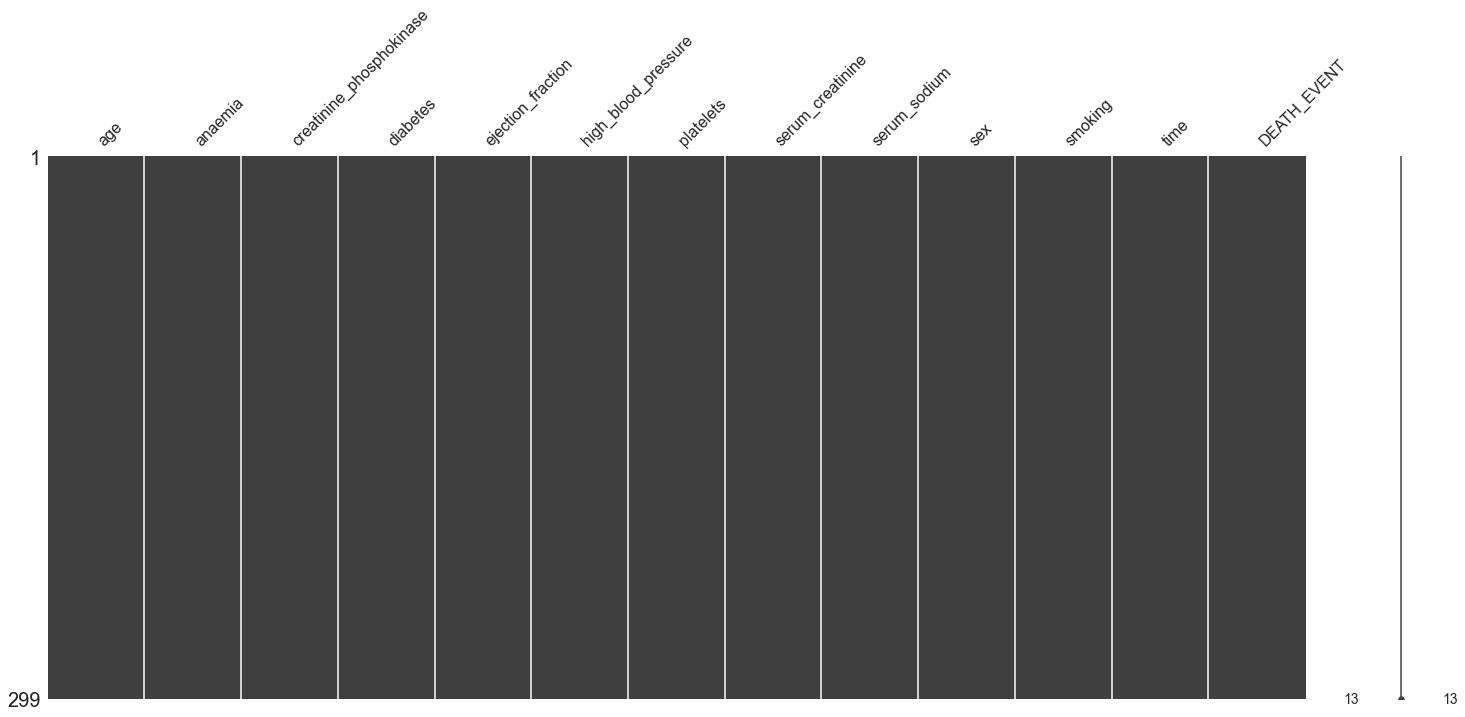

In [32]:
msn.matrix(df)

In [33]:
## There is no missing data!!

# Data Analysis

## Univariate Analysis (Continuous)

In [34]:
continuous = df.drop(["anaemia", "diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"], axis = 1)

In [35]:
continuous.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


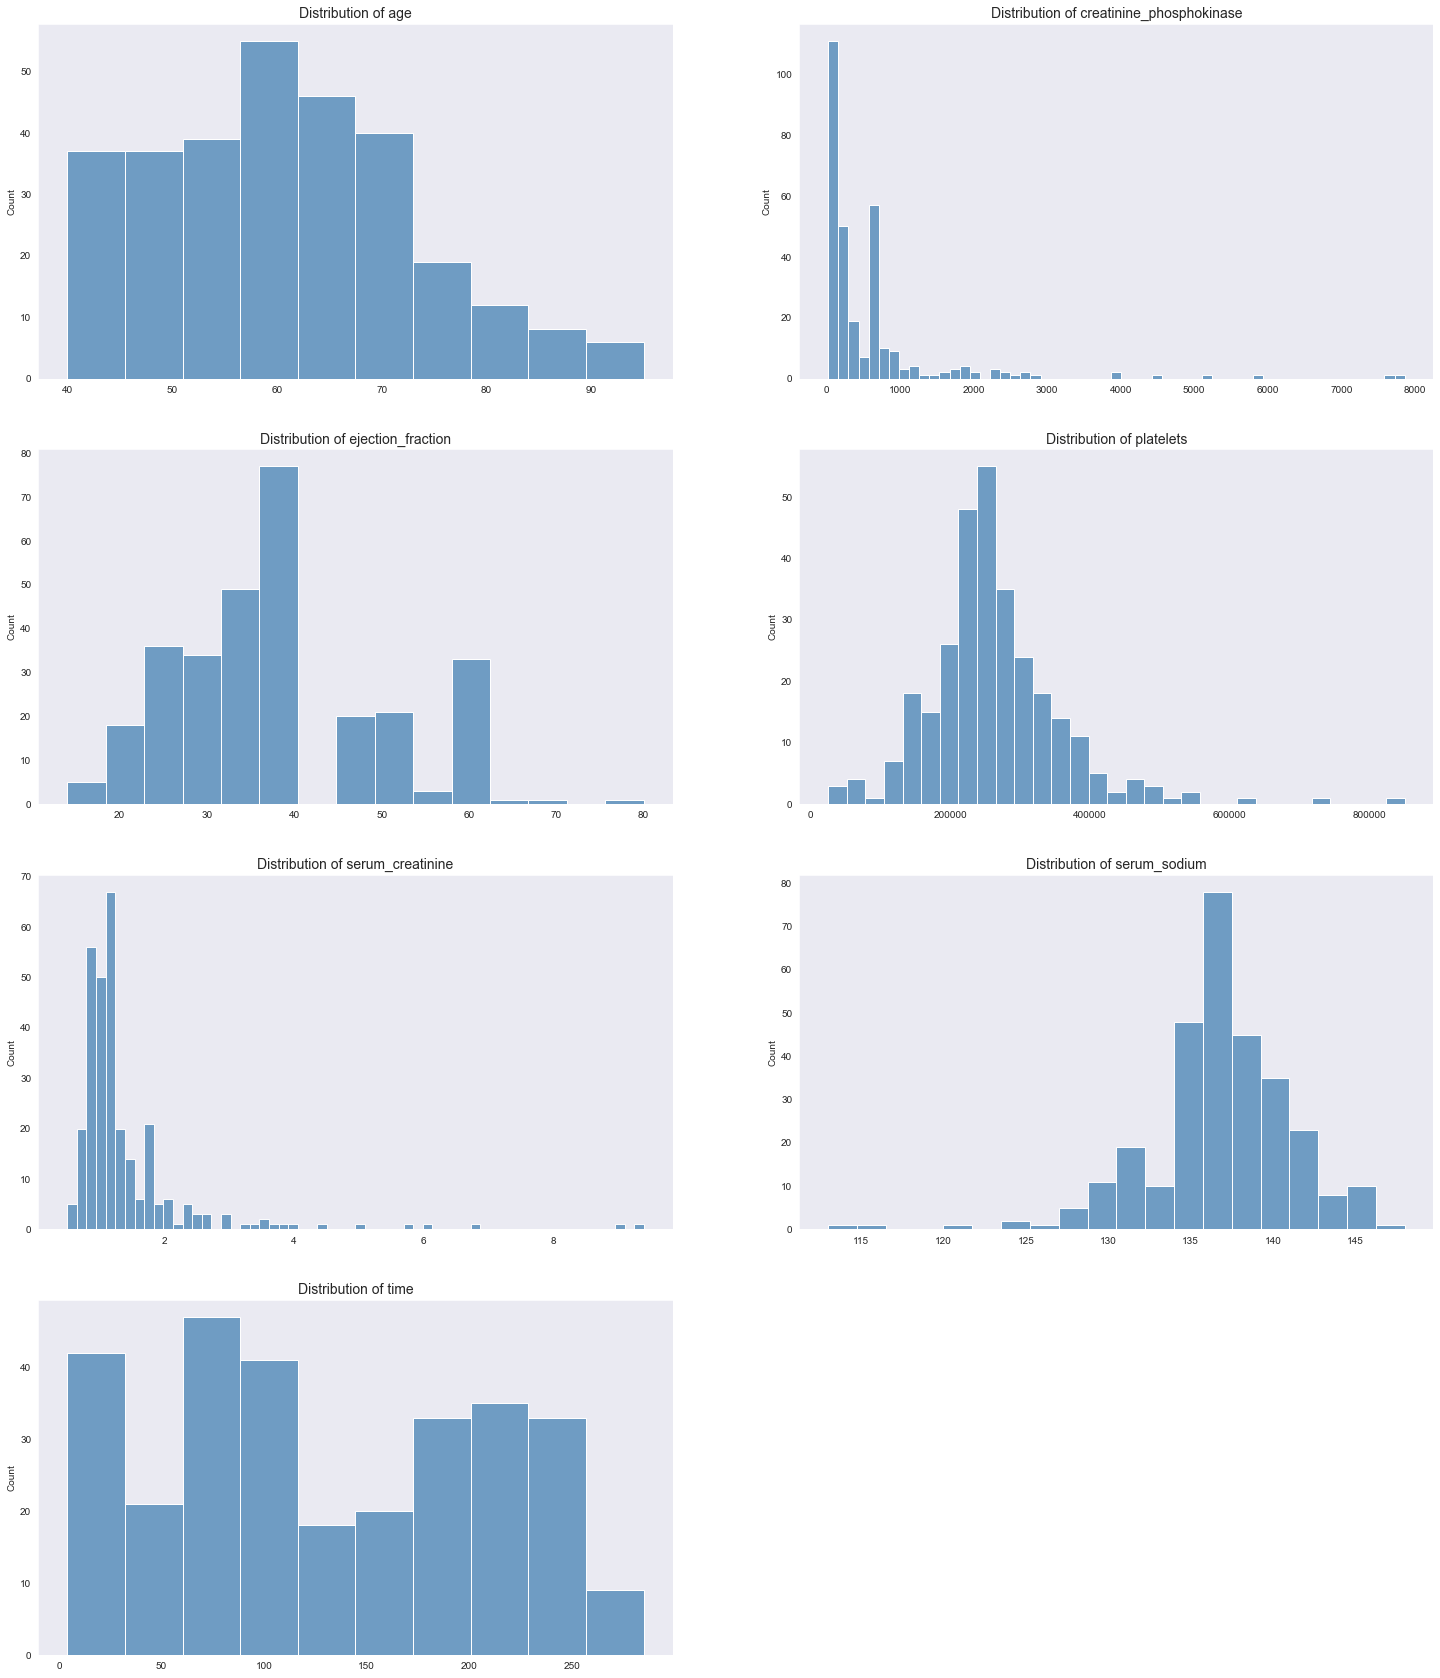

In [36]:
fig = plt.figure(figsize = (25,30))
sns.set_style("dark")
for i in range(len(continuous.columns)):
    plt.subplot(4,2,i+1)
    sns.histplot(continuous.iloc[:,i], color = "steelblue")
    plt.title("Distribution of {}".format(continuous.iloc[:,i].name), size = 14)
    plt.xlabel("")

## Univariate analysis (discrete)

In [37]:
discrete = df[["anaemia", "diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]]

In [38]:
discrete.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1


C:\Users\PMMCardoso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PMMCardoso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PMMCardoso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PMMCard

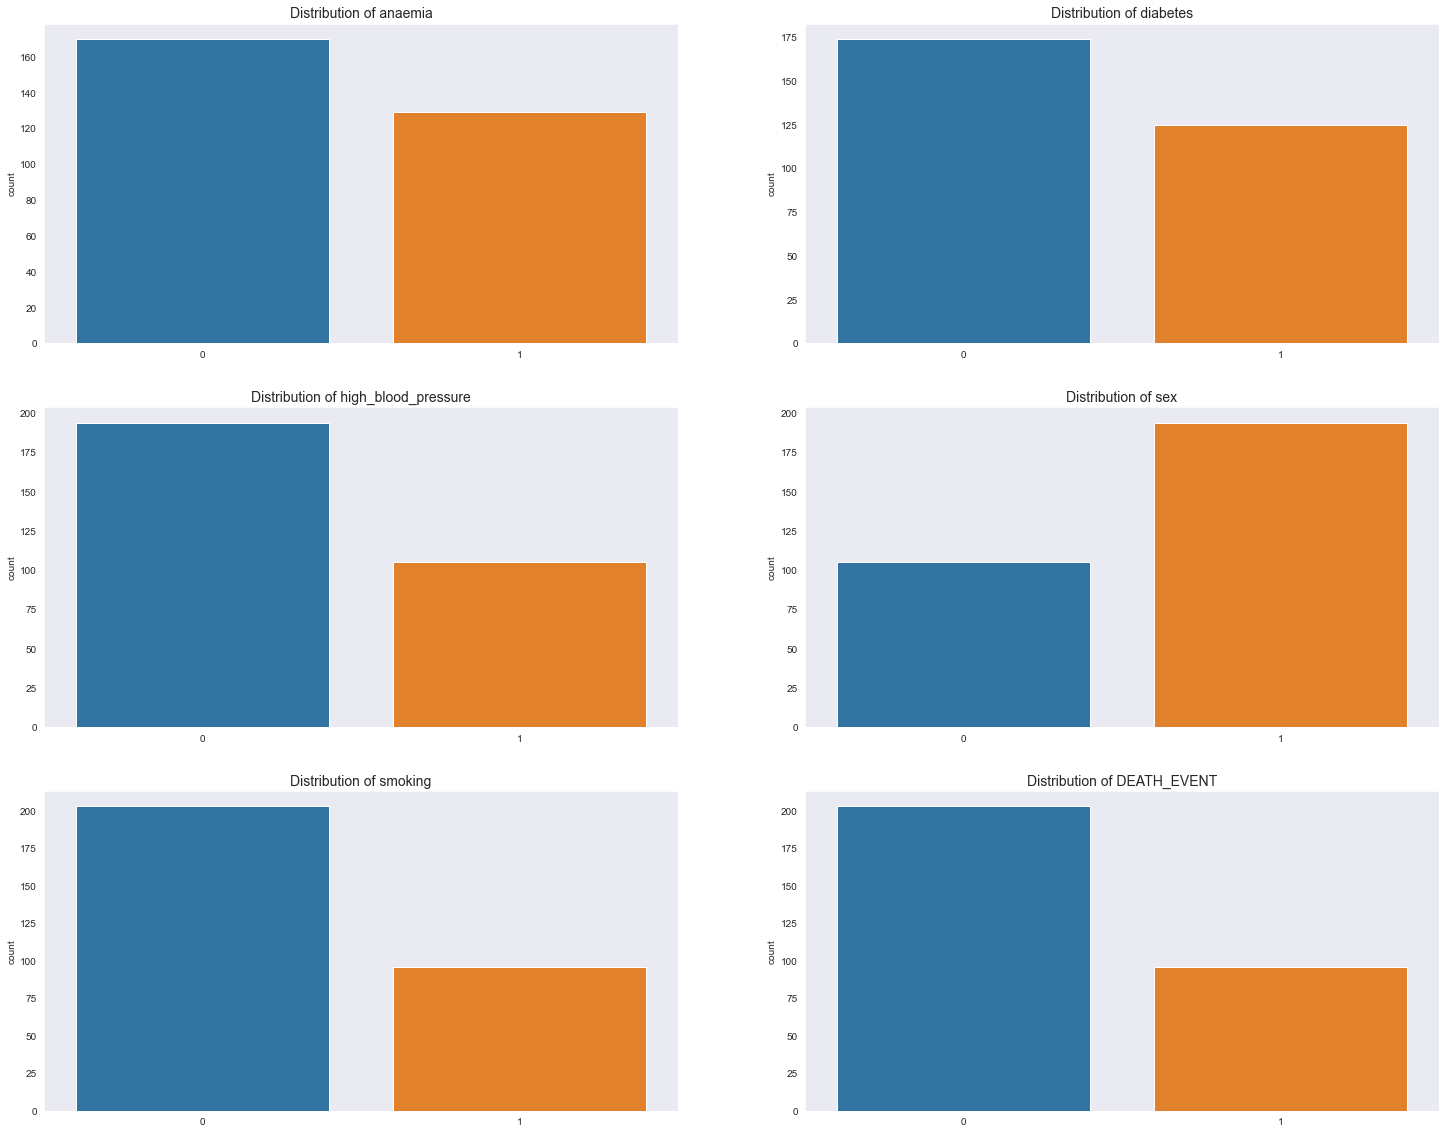

In [39]:
fig2 = plt.figure(figsize = (25,20))
sns.set_style("dark")
for i in range(len(discrete.columns)):
    plt.subplot(3,2,i+1)
    sns.countplot(discrete.iloc[:,i])
    plt.title("Distribution of {}".format(discrete.iloc[:,i].name), size = 14)
    plt.xlabel("")

## Bivariate analysis

### Sex and Death

In [40]:
sex = df.groupby("sex")["DEATH_EVENT"].sum().reset_index()
totals = pd.DataFrame(df["sex"].value_counts(ascending=True))
totals.columns = ["totals"]
pct_table = pd.concat([sex,totals], axis = 1)
pct_table["pct"] = pct_table["DEATH_EVENT"] * 100 / pct_table["totals"]
pct_table


,sex,DEATH_EVENT,totals,pct
0,0,34,105,32.380952
1,1,62,194,31.958763


Text(0, 0.5, 'Percentage')

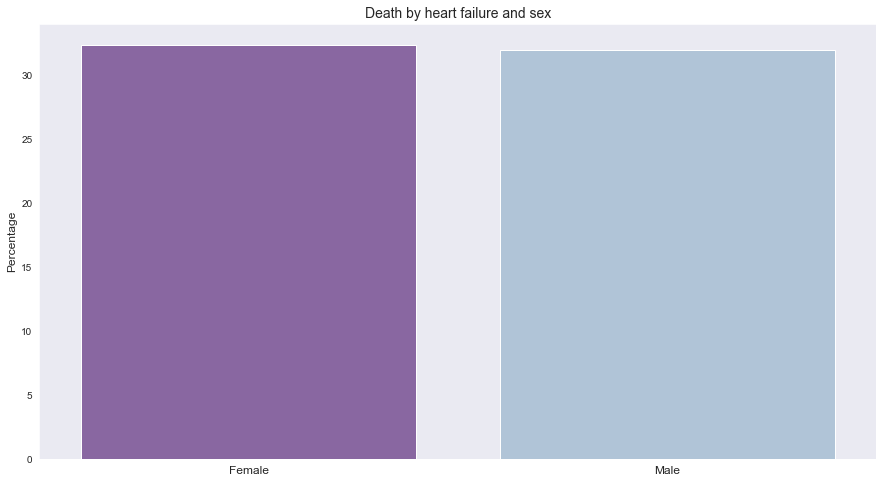

In [41]:
plt.figure(figsize =(15,8))
sns.set_style("dark")
sns.barplot(x = "sex", y = "pct", data = pct_table, palette = "BuPu_r")
plt.title("Death by heart failure and sex", size = 14)
plt.xticks([0,1],["Female","Male"], size = 12)
plt.xlabel("")
plt.ylabel("Percentage", size = 12)

### Smoking and Death

In [42]:
smk = df.groupby("smoking")["DEATH_EVENT"].sum().reset_index()
totals = pd.DataFrame(df["smoking"].value_counts(ascending=True))
totals.columns = ["totals"]
pct_table = pd.concat([smk,totals], axis = 1)
pct_table["pct"] = pct_table["DEATH_EVENT"] * 100 / pct_table["totals"]
pct_table

,smoking,DEATH_EVENT,totals,pct
0,0,66,203,32.512315
1,1,30,96,31.250000


Text(0, 0.5, 'Percentage')

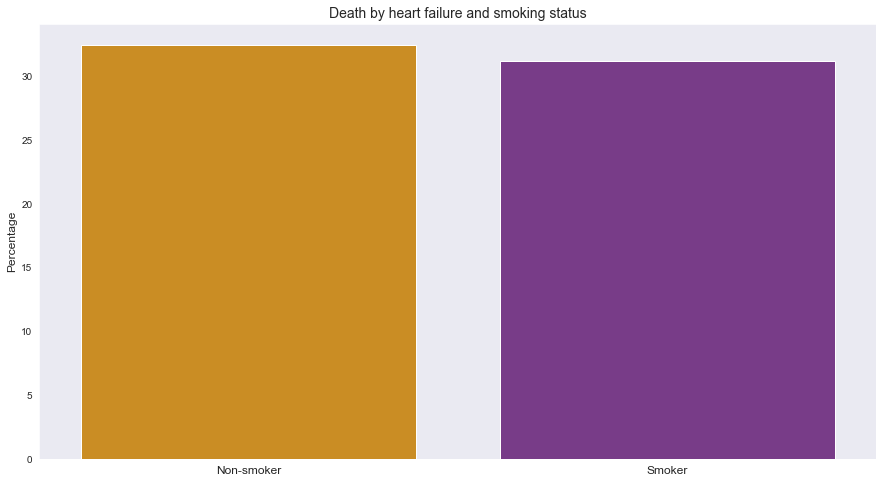

In [18]:
plt.figure(figsize =(15,8))
sns.set_style("dark")
sns.barplot(x = "smoking", y = "pct", data = pct_table, palette = "CMRmap_r")
plt.title("Death by heart failure and smoking status", size = 14)
plt.xticks([0,1],["Non-smoker","Smoker"], size = 12)
plt.xlabel("")
plt.ylabel("Percentage", size = 12)

### Diabetes and Death

In [19]:
dbt = df.groupby("diabetes")["DEATH_EVENT"].sum().reset_index()
totals = pd.DataFrame(df["diabetes"].value_counts(ascending=True))
totals.columns = ["totals"]
pct_table = pd.concat([dbt,totals], axis = 1)
pct_table["pct"] = pct_table["DEATH_EVENT"] * 100 / pct_table["totals"]
pct_table

,diabetes,DEATH_EVENT,totals,pct
0,0,56,174,32.183908
1,1,40,125,32.000000


Text(0, 0.5, 'Percentage')

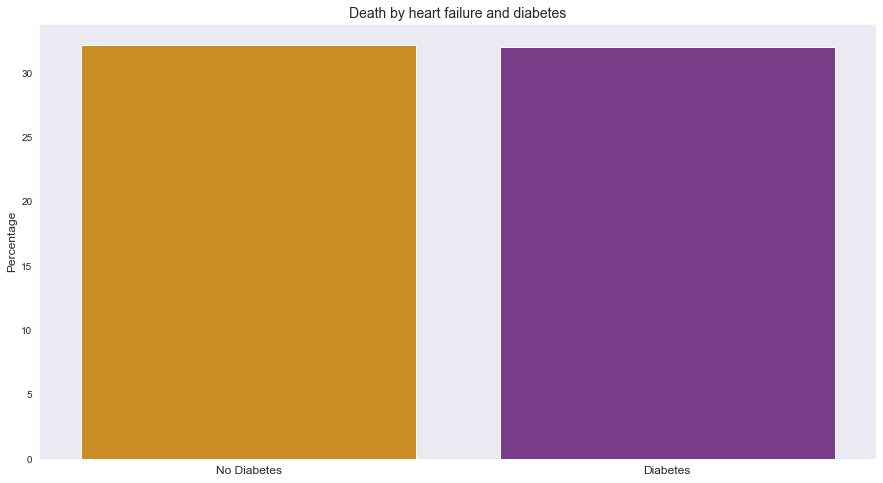

In [20]:
plt.figure(figsize =(15,8))
sns.set_style("dark")
sns.barplot(x = "diabetes", y = "pct", data = pct_table, palette = "CMRmap_r")
plt.title("Death by heart failure and diabetes", size = 14)
plt.xticks([0,1],["No Diabetes","Diabetes"], size = 12)
plt.xlabel("")
plt.ylabel("Percentage", size = 12)

## Multivariate Analysis

### Sex, Age and Death

Text(0.5, 0, 'Sex')

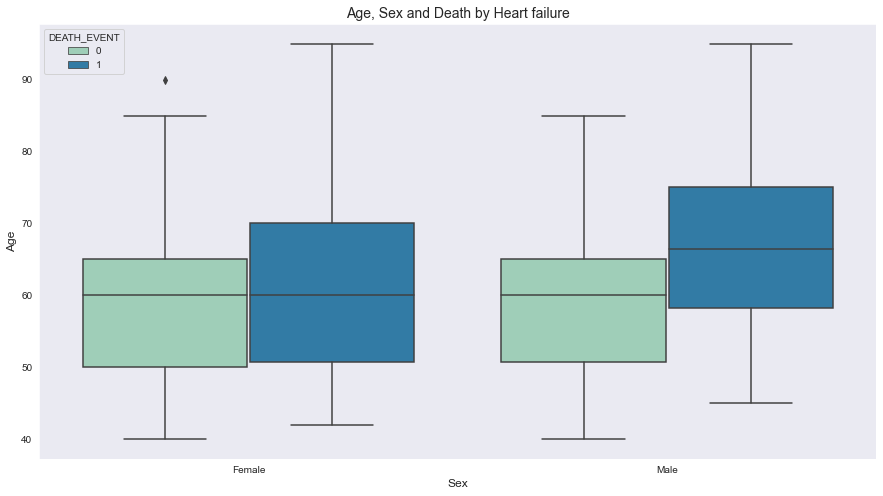

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "sex", y = "age", data = df, hue = "DEATH_EVENT", palette = "YlGnBu")
plt.title("Age, Sex and Death by Heart failure", size = 14)
plt.xticks([0,1],["Female","Male"])
plt.ylabel("Age", size = 12)
plt.xlabel("Sex", size = 12)

### Ejection Fraction, Smoking and Death

Text(0.5, 0, 'Smoking Status')

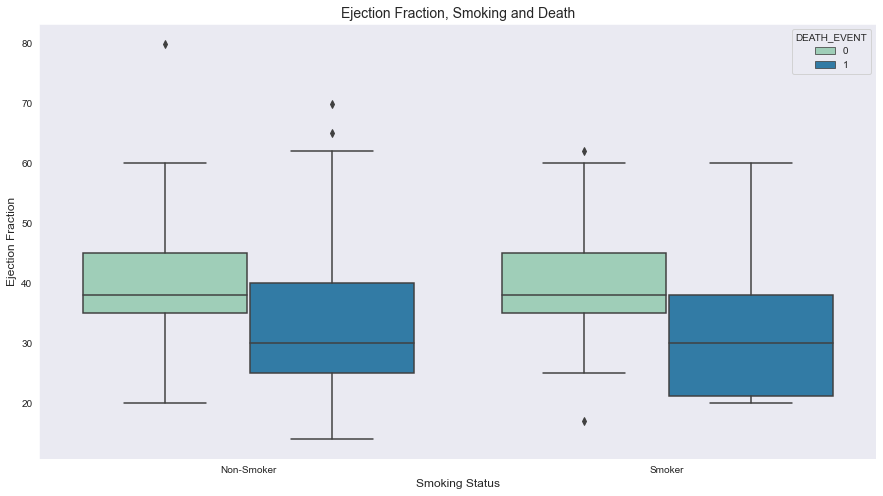

In [22]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "smoking", y = "ejection_fraction", data = df, hue = "DEATH_EVENT", palette = "YlGnBu")
plt.title("Ejection Fraction, Smoking and Death", size = 14)
plt.xticks([0,1],["Non-Smoker","Smoker"])
plt.ylabel("Ejection Fraction", size = 12)
plt.xlabel("Smoking Status", size = 12)

## Correlations

Text(0.5, 1.0, 'Correlation between features')

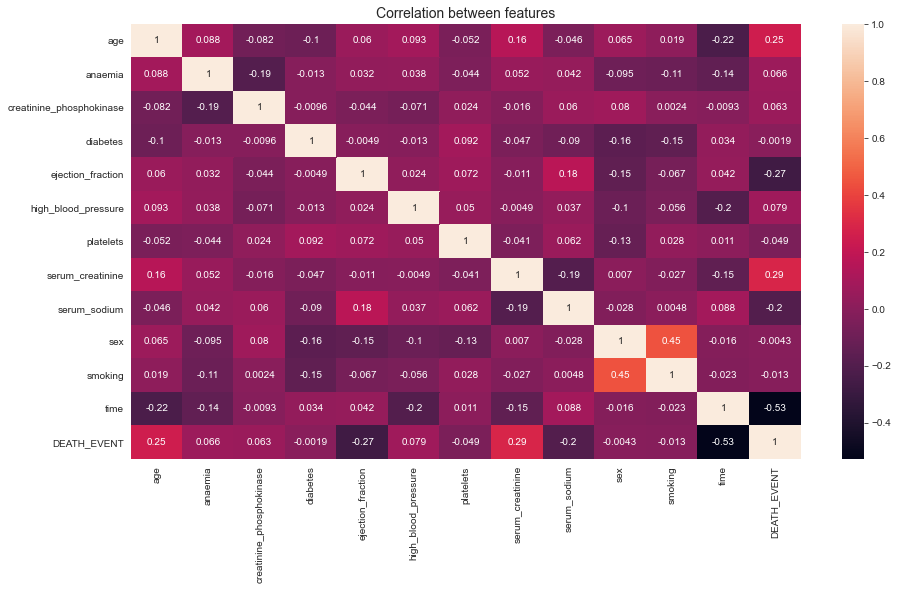

In [23]:
cor = df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(cor, annot = True)
sns.set_style("dark")
plt.title("Correlation between features", size = 14)

In [24]:
## As time goes by the risk of death decreases
## Age and Creatinine seem to have some positive correlation with death
## Ejection Fraction and sodium to have a negative correlation

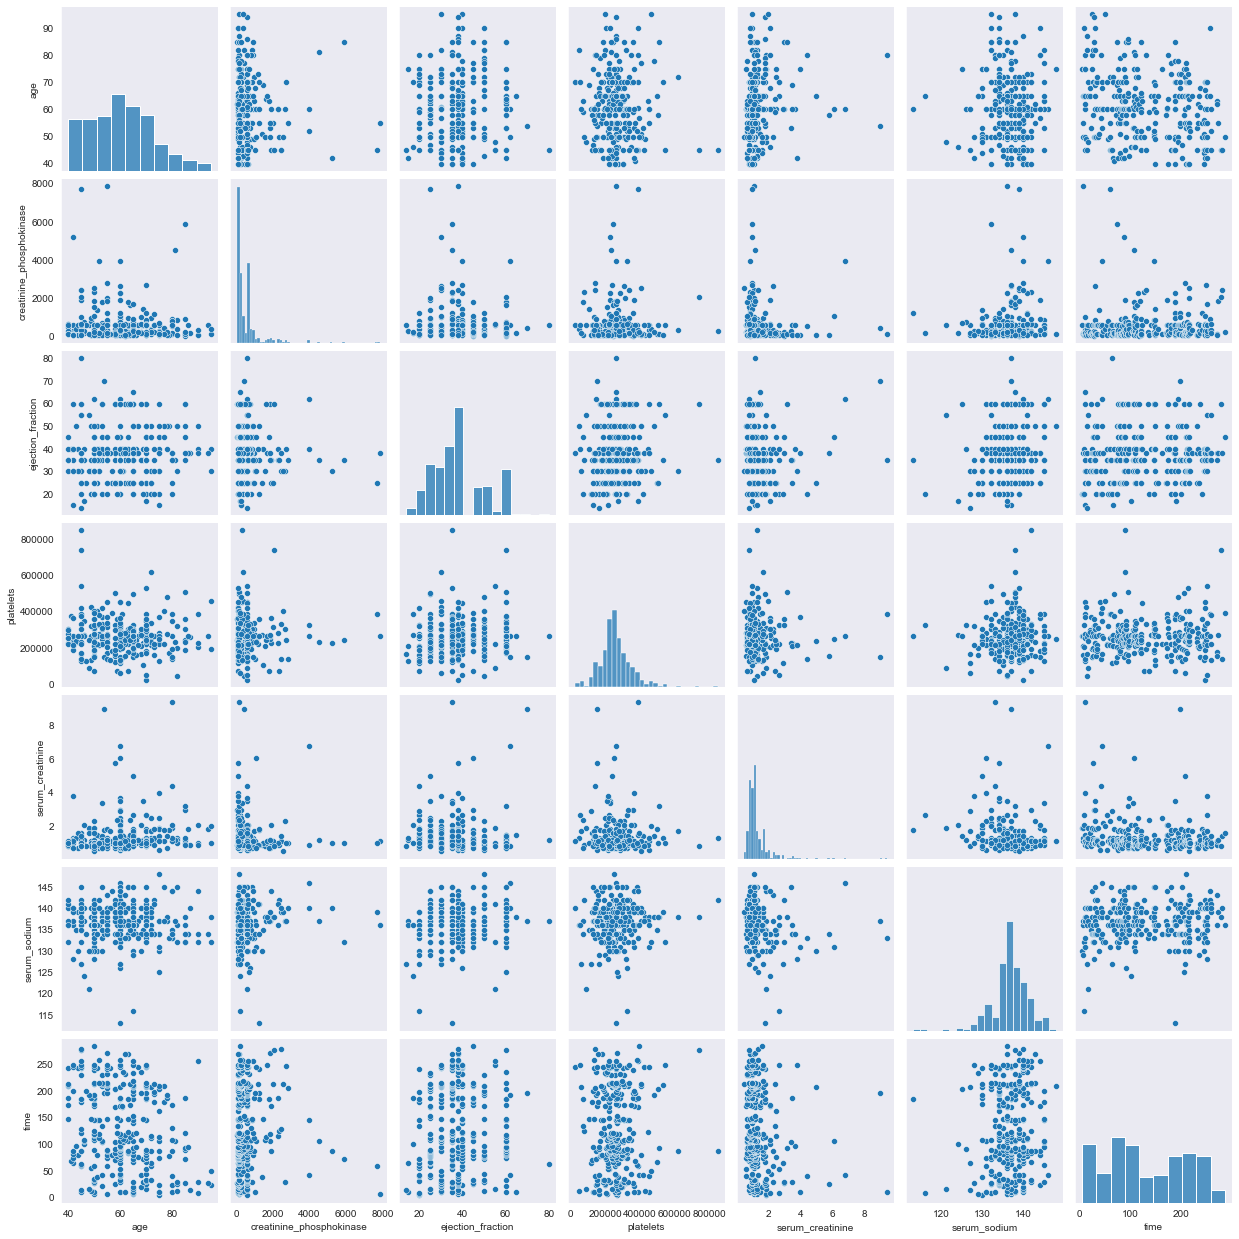

In [25]:
sns.pairplot(continuous)

In [26]:
## Patterns are low

# ML

## Data Preparation

In [27]:
df = df.astype(int)

## Splitting

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("DEATH_EVENT", axis = 1), df.DEATH_EVENT, random_state = 7)

## Scaling

In [29]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Comparing Models

In [30]:
models = []
models.append(("KNN",KNeighborsClassifier()))
models.append(("XGB", XGBClassifier(use_label_encoder=False, verbosity = 0)))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("LOGI",LogisticRegressionCV()))

results = []
names = []

for name,model in models:
    cv = KFold(n_splits=10)
    result = cross_validate(model, df.drop("DEATH_EVENT", axis = 1), df.DEATH_EVENT, scoring = ["accuracy","precision", "f1"], cv = cv)
    d1 = pd.DataFrame(result).apply(lambda x : x.mean())
    results.append(d1)
    names.append(name)




C:\Users\PMMCardoso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMMCardoso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMMCardoso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\PMMCardoso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined 

#### Which one is the best model?

In [31]:
pd.DataFrame(results, index = names)

,fit_time,score_time,test_accuracy,test_precision,test_f1
KNN,0.004290,0.006481,0.621954,0.446667,0.241568
XGB,0.090607,0.009640,0.806667,0.437685,0.392377
RF,0.252637,0.023536,0.826667,0.460985,0.367078
DT,0.012094,0.013803,0.742644,0.416388,0.385575
LOGI,0.592799,0.009967,0.800000,0.287678,0.304777


In [32]:
## Considering the f1 score, the selected model is XgBoost

## 1st Model Iteration

In [33]:
model = XGBClassifier(random_state = 7)

In [34]:
model.fit(X_train, y_train)

C:\Users\PMMCardoso\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
prediction = model.predict(X_test)

### Evaluate the 1st Iteration

In [36]:
Acc = accuracy_score(y_test,prediction)
Prc = precision_score(y_test,prediction)
f1 = f1_score(y_test, prediction)

print("The accuracy is {}".format(Acc))
print("The precision is {}".format(Prc))
print("The f1 is {}".format(f1))

The accuracy is 0.8266666666666667
The precision is 0.6086956521739131
The f1 is 0.6829268292682927


In [37]:
## These are good values, but now it is important to optimize the model

## Hyperparameter Tuning (Random)

In [39]:
parameters_rand = {
    "max_depth" : [1,5,10],
    "min_child_weight" : [1,2,4,6],
    "learning_rate" : [0.001,0.01,0.1],
    "subsample" : [0.2,0.5,0.8],
    "n_estimators" : [100,200,300]
}

In [40]:
r_s = RandomizedSearchCV(model, param_distributions=parameters_rand, cv = cv, n_iter = 10, scoring = "precision")

In [41]:
r_s.fit(X_train,y_train)

C:\Users\PMMCardoso\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\PMMCardoso\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\PMMCardoso\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_...
                                           n_estimators=100, n_jobs=4,
                                           num_parallel_tree=1, random_state=7,
                                           reg_alpha=0, reg_lambda=1,
  

In [42]:
r_s.best_params_

{'subsample': 0.2,
 'n_estimators': 300,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.001}

## Hyperparameter tuning (Grid)

In [44]:
parameters_gs = {
    "max_depth" : [4,5,6],
    "min_child_weight" : [1,2,3],
    "learning_rate" : [0.001],
    "subsample" : [0.1,0.2,0.3],
    "n_estimators" : [250,300,350]
}

In [45]:
g_s = GridSearchCV(model, param_grid=parameters_gs, cv = cv, scoring = "precision", n_jobs = -1)

In [46]:
g_s.fit(X_train,y_train)

C:\Users\PMMCardoso\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constr...='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=7,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree

In [29]:
g_s.best_params_

NameError: name 'g_s' is not defined

## Tuned model

In [43]:
df = df.astype(float)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("DEATH_EVENT", axis = 1), df.DEATH_EVENT, random_state = 7)

In [45]:
model = XGBClassifier(learning_rate = 0.001, max_depth = 4, min_child_weight = 1, n_estimators = 250, subsample = 0.1, random_state = 7, verbosity = 0)

In [46]:
model.fit(X_train,y_train)

C:\Users\PMMCardoso\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [47]:
prediction = model.predict(X_test)

In [48]:
Acc = accuracy_score(y_test,prediction)
Prc = precision_score(y_test,prediction)
f1 = f1_score(y_test, prediction)
AUC = roc_auc_score(y_test,prediction)

print("The accuracy is {}".format(Acc))
print("The precision is {}".format(Prc))
print("The f1 is {}".format(f1))
print("The ROC AUC is {}".format(AUC))

The accuracy is 0.8933333333333333
The precision is 0.9166666666666666
The f1 is 0.7333333333333334
The ROC AUC is 0.7967836257309941


### SHAP analysis

In [49]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

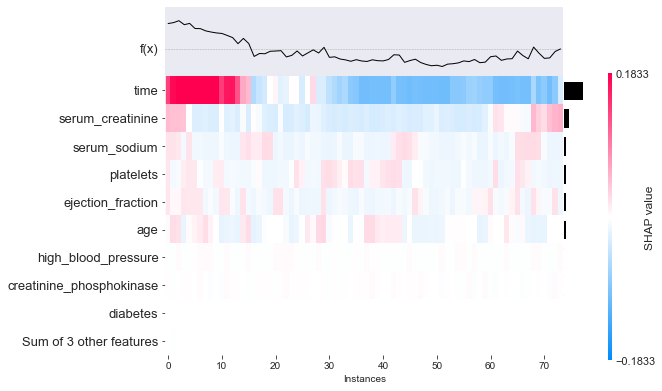

In [50]:
shap.plots.heatmap(shap_values[1:100])

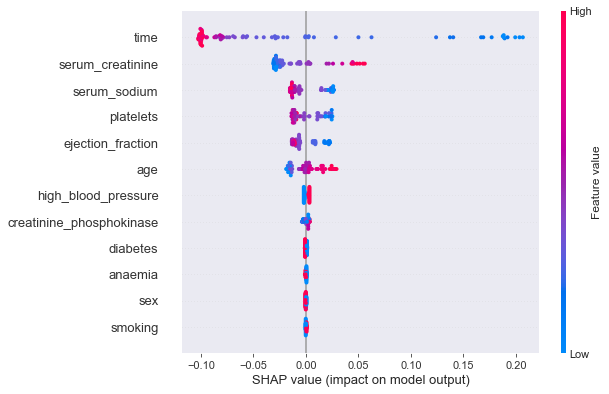

In [51]:
shap.summary_plot(shap_values)

In [52]:
## Time is extremely important in this model, despite having a low feature value (The lower time, the less chance od death)
## Diabetes and smoking, to my suprise, have low impact
## Higher age, as expeted, is linked to death

# Deploying the model

## Pickle

In [53]:
import pickle
pickle_out = open("hearth_model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

## Designing Streamlit App

In [57]:
%%writefile app.py

## Load packages

import pickle
import streamlit as st
import pandas as pd

## Loading Model

pickle_in = open("Hearth_model.pkl", 'rb')
classifier = pickle.load(pickle_in)

## Creating pre-processing function

Hypertension = 0
Diabetes = 0
Sex = 0
Smoking = 0

def pred_function(time,serum_sodium,ejection_fraction,age,platelets,serum_creatinine,creatinine_phosphokinase, Hypertension,Sex, Anaemia, Diabetes, Smoking):
    if Anaemia == "Yes":
        anaemia = 1
    else:
        anaemia = 0
    if Diabetes == "Yes":
        diabetes = 1
    else:
        diabetes = 0
    if Hypertension == "Yes":
        high_blood_pressure = 1
    else: 
        high_blood_pressure = 0
    if Sex == "Male":
        sex = 1
    else:
        sex = 0
    if Smoking == "Smoker":
        smoking = 1
    else:
        smoking = 0
    
    
    ## Creating prediction function

    input_user = pd.DataFrame([[age,anaemia,creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time]])

    predictor = classifier.predict(input_user)
    
    return predictor

## Main page

def main():
    st.markdown("teste")

    Sex = st.radio("Gender",("Male","Female"))
    age = st.slider("Age", min_value = 18, max_value = 110, step = 1)
    time = st.slider("Days After Diagnosis", min_value = 0, max_value = 100, step = 1)
    Anaemia = st.radio("Does the patient has anaemia?",("Yes","No"))
    Diabetes = st.radio("Does the patient has diabetes?",("Yes","No"))
    Smoking = st.radio("Smoking status",("Smoker","Non-Smoker"))
    platelets = st.number_input("Platelets (Kp/ml")
    serum_sodium = st.number_input("Sodium blood level (mEq/L")
    serum_creatinine = st.number_input("Sodium blood level (mg/dl")
    creatinine_phosphokinase = st.number_input("CPK blood level (ug/L")
    ejection_fraction = st.number_input("Ejection Fraction (%)")

    if st.button("Predict"):
        result = pred_function(time,serum_sodium,ejection_fraction,age,platelets,serum_creatinine,creatinine_phosphokinase, Hypertension,Sex, Anaemia, Diabetes, Smoking)
        st.success("The death event is {}".format(result))

if __name__=='__main__': 
    main()
    


Overwriting app.py


In [56]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
114,60.0,1.0,754.0,1.0,40.0,1.0,328000.00,1.20,126.0,1.0,0.0,91.0
160,66.0,1.0,72.0,0.0,40.0,1.0,242000.00,1.20,134.0,1.0,0.0,121.0
132,46.0,0.0,719.0,0.0,40.0,1.0,263358.03,1.18,137.0,0.0,0.0,107.0
61,50.0,0.0,318.0,0.0,40.0,1.0,216000.00,2.30,131.0,0.0,0.0,60.0
173,50.0,1.0,115.0,0.0,20.0,0.0,189000.00,0.80,139.0,1.0,0.0,146.0
